In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [4]:
inputDir = '../seti-breakthrough-listen'
df_train = pd.read_csv(os.path.join(inputDir, 'train_labels.csv'))
df_sub = pd.read_csv(os.path.join(inputDir, 'sample_submission.csv'))
df_train_pos = df_train[df_train.target == 1]

In [14]:
def load_sample(idx):
    try:
        x = np.load(os.path.join(inputDir, 'train', idx[0], idx + '.npy'))
    except:
        x = np.load(os.path.join(inputDir, 'test', idx[0], idx + '.npy'))
    return x.astype(np.float32)

def show_example(x, p=0):
    x = x.reshape(-1, x.shape[2])
    x = np.clip(x, np.percentile(x, p), np.percentile(x, 100-p))

    fig, ax = plt.subplots()
    fig.set_size_inches(18, 3)
    ax.set_xticks(np.arange(1,6)*273)
    ax.set_yticks([])
    ax.grid(True)
    ax.imshow(x.T, aspect="auto", cmap="Greys")


In [5]:
idx = df_train_pos.id.iloc[5]

In [6]:
idx

'004933b94083be2'

In [15]:
x = load_sample(idx)

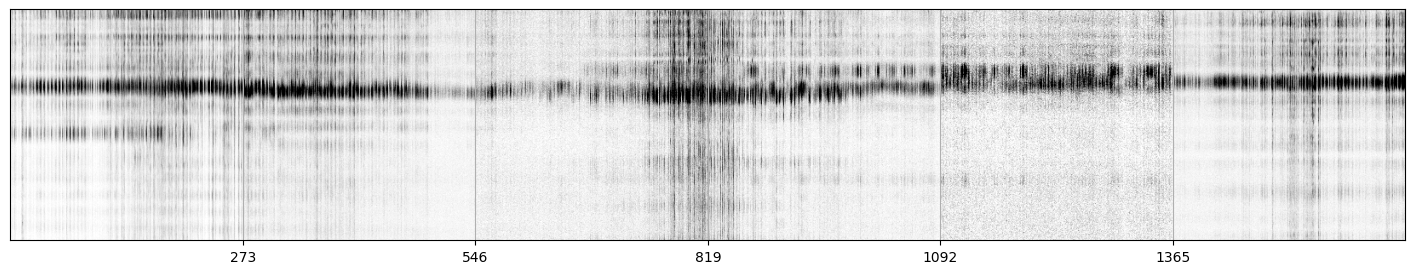

In [16]:
show_example(x, 1)

In [17]:
df_train.head()

,id,target
0,0000799a2b2c42d,0
1,00042890562ff68,0
2,0005364cdcb8e5b,0
3,0007a5a46901c56,0
4,0009283e145448e,0


In [18]:
#test = np.load('/Users/ssethuram6/Dropbox/Classwork/ComputationalPhysics2022/SETI_CNN/seti-breakthrough-listen/3/3a0a50a5afa5826.npy')

In [20]:
#test.shape

(6, 273, 256)

In [23]:
import sys
import pandas as pd, numpy as np, os
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import math

In [27]:
import warnings
import random
import seaborn as sns
from typing import *
import albumentations as A
from sklearn.model_selection import StratifiedKFold, GroupKFold, KFold
import cv2

In [25]:
import timm 
import torch
import torch.nn.functional as F
from albumentations.pytorch.transforms import ToTensorV2
from sklearn.preprocessing import LabelEncoder
from torch import nn
from torch.autograd import Variable
from torch.optim.lr_scheduler import _LRScheduler
from torch.optim.optimizer import Optimizer


In [26]:
from torchvision import models
from tqdm.notebook import tqdm
import pandas as pd
warnings.filterwarnings("ignore")
from torch.utils.data import DataLoader, Dataset
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, CosineAnnealingLR, ReduceLROnPlateau
from IPython.display import clear_output 
clear_output()

In [28]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [31]:
seed = 1000
os.environ["PYTHONHASHSEED"] = str(seed)


1000


In [32]:
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.cuda.manual_seed(seed)  # pytorch (both CPU and CUDA)
np.random.seed(seed)  # for numpy pseudo-random generator
random.seed(seed)  # set fixed value for python built-in pseudo-random generator
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.enabled = False

In [33]:
train = pd.read_csv('/Users/ssethuram6/Dropbox/Classwork/ComputationalPhysics2022/SETI_CNN/seti-breakthrough-listen/train_labels.csv')

In [34]:
def get_train_file_path(image_id):
    return "/Users/ssethuram6/Dropbox/Classwork/ComputationalPhysics2022/SETI_CNN/seti-breakthrough-listen/train/{}/{}.npy".format(image_id[0], image_id)

In [35]:
train['file_path'] = train['id'].apply(get_train_file_path)

In [36]:
train.head()

,id,target,file_path
0,0000799a2b2c42d,0,/Users/ssethuram6/Dropbox/Classwork/Computatio...
1,00042890562ff68,0,/Users/ssethuram6/Dropbox/Classwork/Computatio...
2,0005364cdcb8e5b,0,/Users/ssethuram6/Dropbox/Classwork/Computatio...
3,0007a5a46901c56,0,/Users/ssethuram6/Dropbox/Classwork/Computatio...
4,0009283e145448e,0,/Users/ssethuram6/Dropbox/Classwork/Computatio...


In [37]:
df_folds = train.copy()

In [38]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)

In [40]:
for fold, (train_idx, val_idx) in enumerate(skf.split(X=df_folds['id'], y=df_folds['target'])):
    df_folds.loc[val_idx, "fold"] = int(fold+1)


In [42]:
df_folds["fold"] = df_folds['fold'].astype(int)
print(df_folds.groupby(["fold", 'target']).size())

fold  target
1     0         13500
      1          1500
2     0         13500
      1          1500
3     0         13500
      1          1500
4     0         13500
      1          1500
dtype: int64


In [ ]:
class SETIData()